# Libraries


In [ ]:
!pip install ydata-profiling --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install optuna --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.7 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn --q

In [62]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping
from sklearn.model_selection import cross_val_score
import optuna
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances
import pickle
from imblearn.pipeline import Pipeline as ImbPipeline

# Functions

In [28]:
# A function to print the accuracy metrics

def accuracy(y_pred, y_test):
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred)

  print(f'Precision: {precision}')
  print(f'F1 Score: {f1}')
  print(f'Recall: {recall}')
  print(f'ROC-AUC: {auc}')

# Data

In [29]:
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [30]:
# Reading the dataset

df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv", na_values= [" "])

# Got to know from a discussion in Kaggle that there are blank spaces in the dataset

In [31]:
df.shape  # size of the dataset

# There are 7043 rows
# and 21 columns (features + output)

(7043, 21)

In [32]:
df.sample(3)  # viewing the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2233,8097-VBQTZ,Male,0,No,No,54,Yes,No,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,69.90,3883.30,No
1888,9894-QMIMJ,Female,0,No,No,23,Yes,No,DSL,No,...,Yes,No,No,No,One year,No,Bank transfer (automatic),55.80,1327.85,No
5453,4012-YCFAI,Male,0,Yes,No,60,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Mailed check,61.35,3766.20,No


In [33]:
df.info() # knowing the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
# Removing the customer id column
# It semmed un-important
df.drop(columns = 'customerID', inplace = True)

In [35]:
# Making it Categorical
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

In [36]:
# Marking the categorical and the numerical features

CATEGORICAL_COL = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

NUMERICAL_COL = ['tenure', 'MonthlyCharges', 'TotalCharges']

# EDA

In [37]:
# Using Pandas Profiler to get a overview about the data
profile = ProfileReport(df, title="Profiling Report")
profile.to_file(output_file='output.html')
print("Succesfully Executed!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:00<00:00, 30.03it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Succesfully Executed!


Now, doing EDA as per requirment

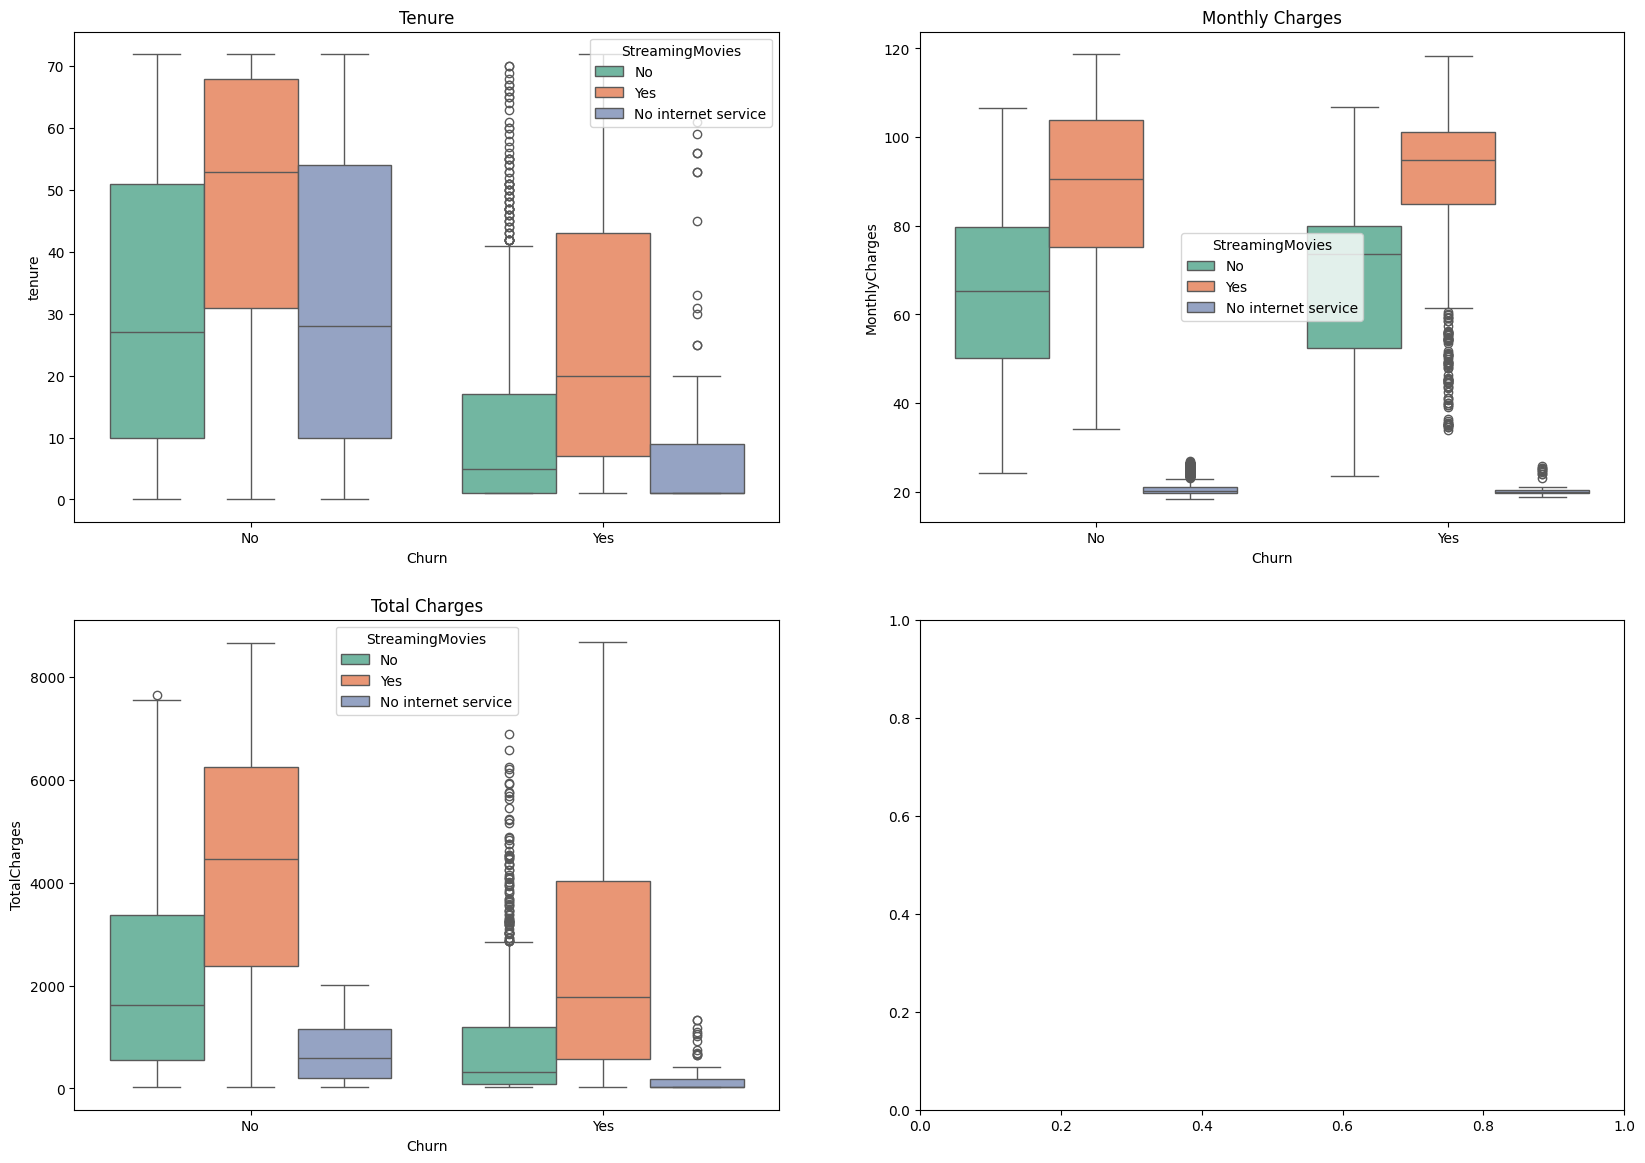

In [38]:
# Boxplot wrt to Churn and Streaming Moviea

fig, ax = plt.subplots(2, 2, figsize=(20, 14))

sns.boxplot(data=df, x='Churn', y='tenure', hue = 'StreamingMovies', palette='Set2', ax=ax[0, 0])
ax[0, 0].set_title('Tenure')

sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue = 'StreamingMovies', palette='Set2', ax=ax[0, 1])
ax[0, 1].set_title('Monthly Charges')

sns.boxplot(data=df, x='Churn', y='TotalCharges', hue = 'StreamingMovies', palette='Set2', ax=ax[1, 0])
ax[1, 0].set_title('Total Charges')

plt.show()

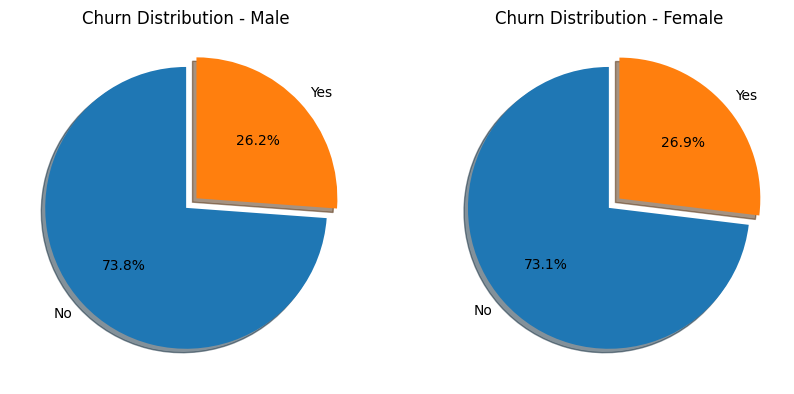

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))

explode = (0, 0.1)

male_churn = df[df['gender'] == 'Male']['Churn'].value_counts()
female_churn = df[df['gender'] == 'Female']['Churn'].value_counts()

ax[0].pie(male_churn, labels=male_churn.index, autopct='%1.1f%%',
          startangle=90, explode=explode, shadow=True)
ax[0].set_title('Churn Distribution - Male')

ax[1].pie(female_churn, labels=female_churn.index, autopct='%1.1f%%',
          startangle=90, explode=explode, shadow=True)
ax[1].set_title('Churn Distribution - Female')

plt.show()

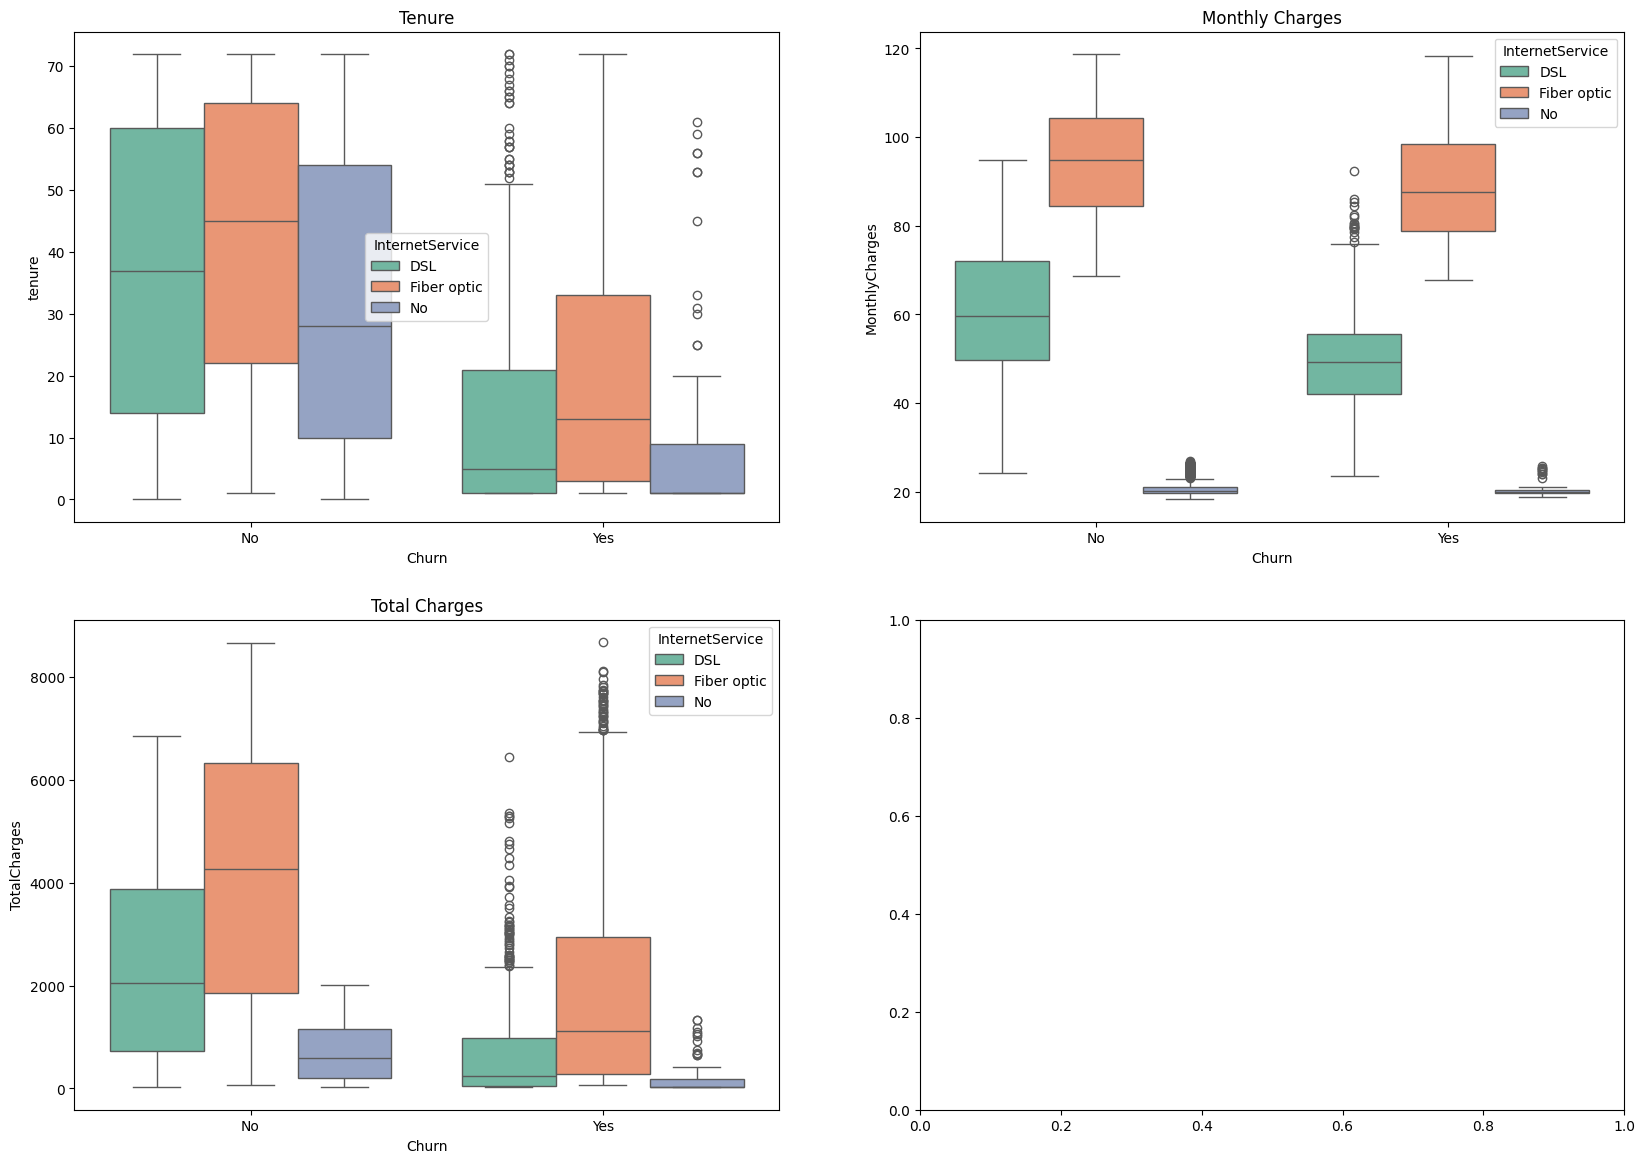

In [40]:
# Boxplot

fig, ax = plt.subplots(2, 2, figsize=(20, 14))

sns.boxplot(data=df, x='Churn', y='tenure', hue = 'InternetService', palette='Set2', ax=ax[0, 0])
ax[0, 0].set_title('Tenure')

sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue = 'InternetService', palette='Set2', ax=ax[0, 1])
ax[0, 1].set_title('Monthly Charges')

sns.boxplot(data=df, x='Churn', y='TotalCharges', hue = 'InternetService', palette='Set2', ax=ax[1, 0])
ax[1, 0].set_title('Total Charges')

plt.show()

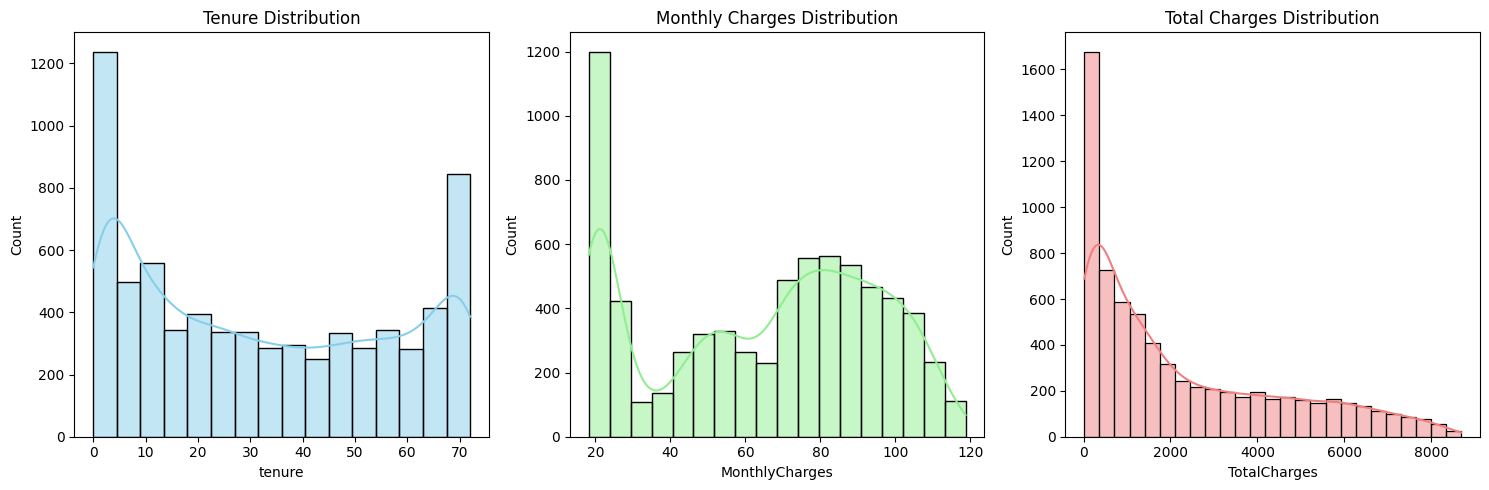

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['tenure'], ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Tenure Distribution')

sns.histplot(df['MonthlyCharges'], ax=ax[1], kde=True, color='lightgreen')
ax[1].set_title('Monthly Charges Distribution')

sns.histplot(df['TotalCharges'].dropna(), ax=ax[2], kde=True, color='lightcoral')
ax[2].set_title('Total Charges Distribution')

plt.tight_layout()
plt.show()

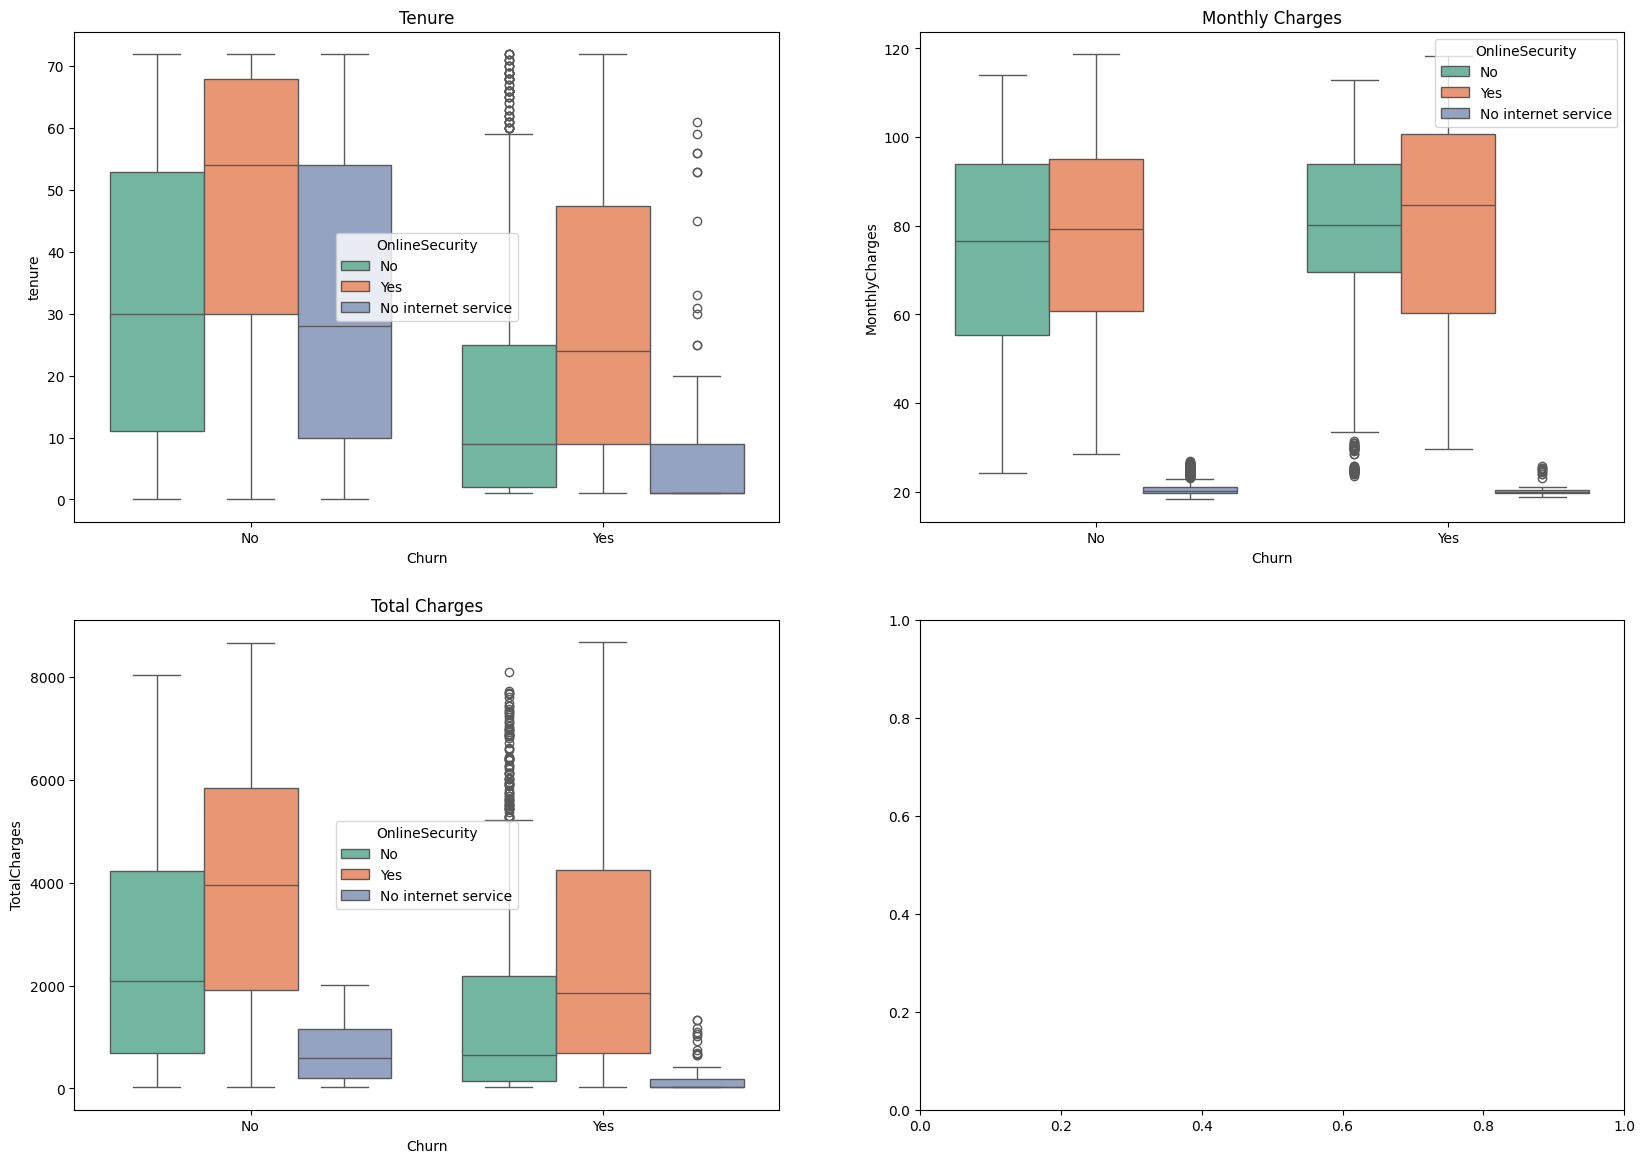

In [42]:
# Boxplot

fig, ax = plt.subplots(2, 2, figsize=(20, 14))

sns.boxplot(data=df, x='Churn', y='tenure', hue = 'OnlineSecurity', palette='Set2', ax=ax[0, 0])
ax[0, 0].set_title('Tenure')

sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue = 'OnlineSecurity', palette='Set2', ax=ax[0, 1])
ax[0, 1].set_title('Monthly Charges')

sns.boxplot(data=df, x='Churn', y='TotalCharges', hue = 'OnlineSecurity', palette='Set2', ax=ax[1, 0])
ax[1, 0].set_title('Total Charges')

plt.show()

# Train Test Split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Churn']),
                                                 df['Churn'],
                                                 test_size=0.2,
                                                 stratify = df['Churn'],
                                                 random_state=42)

# Feature Engineering

## Encoding

In [44]:
ohe = OneHotEncoder(sparse_output=False, dtype=np.int32)
X_train_new = ohe.fit_transform(X_train[CATEGORICAL_COL])
X_test_new = ohe.transform(X_test[CATEGORICAL_COL])

In [45]:
X_train = np.hstack((X_train[NUMERICAL_COL].values,X_train_new))
X_test = np.hstack((X_test[NUMERICAL_COL].values,X_test_new))

In [46]:
# Label Encoding for output column
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [47]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [48]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [49]:
y_test.sum()/len(y_test)

np.float64(0.2654364797728886)

## Missing Data Imputation

In [50]:
# KNN Imputer
knn = KNNImputer(n_neighbors=5,weights='distance')

X_train = knn.fit_transform(X_train)
X_test = knn.transform(X_test)

## Scaling

In [51]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# SMOTE

In [52]:
# The data here is unbalanced, so we will use SMOTE to balance it

In [53]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Model

## Logistic Regression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)

In [ ]:
accuracy(y_test, y_pred)

Precision: 0.7994652406417112
F1 Score: 0.6196891191709845
Recall: 0.505922165820643


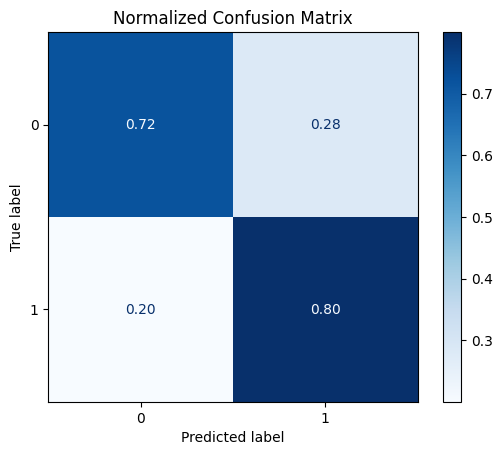

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize = 'true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lg_model.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.title("Normalized Confusion Matrix")
plt.show()

### Parameter Tuning and CV

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000],
    'C': np.logspace(-4, 4, 20)
}

In [ ]:
clf = GridSearchCV(lg_model, param_grid=param_grid, cv = 5, verbose = True, n_jobs=-1)

In [ ]:
%%time
clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
CPU times: user 12.7 s, sys: 1.81 s, total: 14.5 s
Wall time: 24min 6s


In [ ]:
clf.best_score_

np.float64(0.7749424960228848)

In [ ]:
clf.best_params_

{'C': np.float64(1.623776739188721),
 'max_iter': 5000,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
# the hyperparameter tuned model

log_model = LogisticRegression(
    C= 1.623776739188721,
    max_iter= 5000,
    penalty= 'l1',
    solver= 'liblinear'
)

In [ ]:
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [ ]:
accuracy(y_test, y_pred)

Precision: 0.7994652406417112
F1 Score: 0.6190476190476191
Recall: 0.5050675675675675


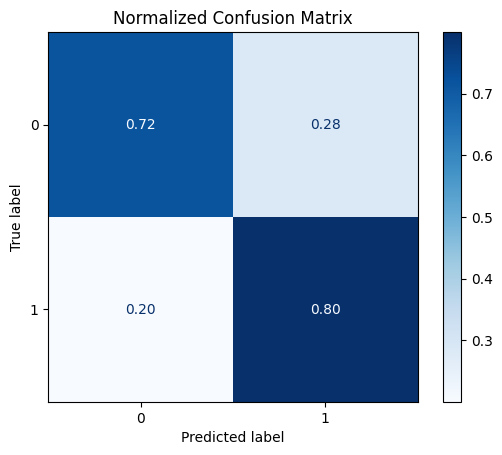

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize = 'true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_model.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.title("Normalized Confusion Matrix")
plt.show()

In [ ]:
cross_val_score(log_model, X_train, y_train, cv=3, scoring='accuracy').mean()

0.7737373339426697

## XGBoost

In [ ]:
xg_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42
)

xg_model = xg_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)


[0]	validation_0-auc:0.81775


/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.82403
[2]	validation_0-auc:0.83317
[3]	validation_0-auc:0.83728
[4]	validation_0-auc:0.83602
[5]	validation_0-auc:0.83833
[6]	validation_0-auc:0.83744
[7]	validation_0-auc:0.83836
[8]	validation_0-auc:0.83803
[9]	validation_0-auc:0.83898
[10]	validation_0-auc:0.83916
[11]	validation_0-auc:0.83963
[12]	validation_0-auc:0.84060
[13]	validation_0-auc:0.84086
[14]	validation_0-auc:0.84044
[15]	validation_0-auc:0.84061
[16]	validation_0-auc:0.83954
[17]	validation_0-auc:0.83987
[18]	validation_0-auc:0.83956
[19]	validation_0-auc:0.83900
[20]	validation_0-auc:0.83995
[21]	validation_0-auc:0.83937
[22]	validation_0-auc:0.83938


In [ ]:
y_pred = xg_model.predict(X_test)

In [ ]:
accuracy(y_test, y_pred)

Precision: 0.6737967914438503
F1 Score: 0.6050420168067226
Recall: 0.5490196078431373
ROC-AUC: 0.7102992776057792


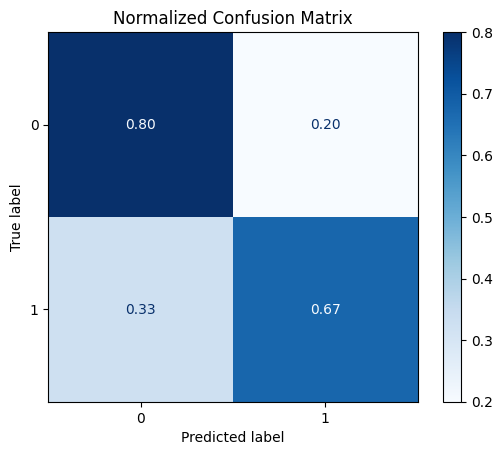

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize = 'true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xg_model.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.title("Normalized Confusion Matrix")
plt.show()

### Parameter Tuning (OPTUNA)

In [ ]:
# Define the objective function
def objective(trial):
    # Suggest values for the hyperparameters
    learning_rate = trial.suggest_categorical('learning_rate', [0.1, 0.01, 0.05])
    max_depth = trial.suggest_categorical('max_depth', [3, 4, 5])
    gamma = trial.suggest_categorical('gamma', [0, 0.25, 0.5, 1.0])
    reg_lambda = trial.suggest_categorical('reg_lambda', [0, 1.0, 10.0])

    # Create the RandomForestClassifier with suggested hyperparameters
    model = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        gamma = gamma,
        reg_lambda = reg_lambda,
        random_state=42
    )

    # Perform 3-fold cross-validation and calculate accuracy
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc').mean()

    return score  # Return the accuracy score for Optuna to maximize

In [ ]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())  # We aim to maximize accuracy
study.optimize(objective, n_trials=100)  # Run 50 trials to find the best hyperparameters

[I 2025-10-23 14:20:28,046] A new study created in memory with name: no-name-fa4a4f45-e374-4408-952c-5869877b140e
[I 2025-10-23 14:20:29,625] Trial 0 finished with value: 0.8836462101022544 and parameters: {'learning_rate': 0.01, 'max_depth': 5, 'gamma': 0.25, 'reg_lambda': 1.0}. Best is trial 0 with value: 0.8836462101022544.
[I 2025-10-23 14:20:30,010] Trial 1 finished with value: 0.8622981671086034 and parameters: {'learning_rate': 0.01, 'max_depth': 3, 'gamma': 1.0, 'reg_lambda': 10.0}. Best is trial 0 with value: 0.8836462101022544.
[I 2025-10-23 14:20:30,643] Trial 2 finished with value: 0.9276517773148472 and parameters: {'learning_rate': 0.1, 'max_depth': 5, 'gamma': 1.0, 'reg_lambda': 0}. Best is trial 2 with value: 0.9276517773148472.
[I 2025-10-23 14:20:31,528] Trial 3 finished with value: 0.8854220914283358 and parameters: {'learning_rate': 0.01, 'max_depth': 5, 'gamma': 1.0, 'reg_lambda': 0}. Best is trial 2 with value: 0.9276517773148472.
[I 2025-10-23 14:20:31,919] Trial

In [ ]:
# Print the best result
print(f'Best trial score: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial score: 0.931777053820429
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'gamma': 0, 'reg_lambda': 0}


In [ ]:
# Training a XGBClassifierr using the best hyperparameters from Optuna
best_model = XGBClassifier(**study.best_trial.params, random_state=42)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
accuracy(y_test, y_pred)


Precision: 0.6470588235294118
F1 Score: 0.606516290726817
Recall: 0.5707547169811321
ROC-AUC: 0.7183722823484342


In [ ]:
cross_val_score(best_model, X_train, y_train, cv=3, scoring='roc_auc').mean()

np.float64(0.931777053820429)

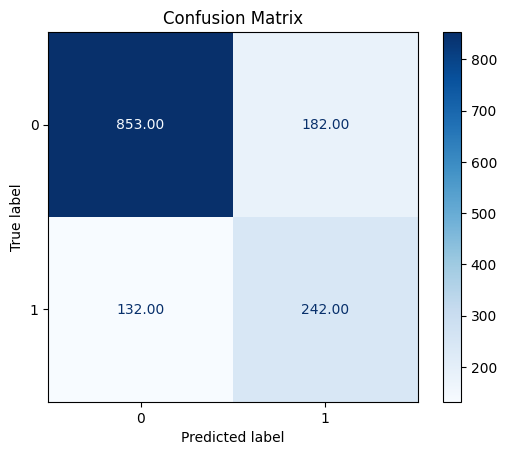

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.title("Confusion Matrix")
plt.show()

**Visualizations**

In [ ]:
# 1. Optimization History
plot_optimization_history(study).show()

In [ ]:
# 2. Parallel Coordinates Plot
plot_parallel_coordinate(study).show()

In [ ]:
# 3. Slice Plot
plot_slice(study).show()

In [ ]:
# 4. Contour Plot
plot_contour(study).show()

In [ ]:
# 5. Hyperparameter Importance
plot_param_importances(study).show()

# SkLearn Pipeline

In [64]:
imputer = KNNImputer()
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Indices of both categorical and numerical columns
CAT_FEATURES = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
NUM_FEATURES = [4, 17, 18]

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipe',
         Pipeline([('imputer', imputer), ('scaler', scaler)]),
         NUM_FEATURES),

        ('cat_pipe', ohe, CAT_FEATURES)
    ],
    remainder='passthrough'
)

# Final Pipeline with SMOTE

final_pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
                  learning_rate= 0.1,
                  max_depth= 5,
                  gamma= 0,
                  reg_lambda= 0,
                  random_state=42))
])

# Fit the Final Pipeline
final_pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_pipe', ...), ('cat_pipe', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [65]:
final_pipe.named_steps

{'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('num_pipe',
                                  Pipeline(steps=[('imputer', KNNImputer()),
                                                  ('scaler', StandardScaler())]),
                                  [4, 17, 18]),
                                 ('cat_pipe',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                   15, 16])]),
 'smote': SMOTE(random_state=42),
 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=0

In [66]:
# Exporting the Pipeline

pickle.dump(final_pipe,open('pipe.pkl','wb'))